# Transform结构及用法

## torchvision中的transforms

In [1]:
from torchvision import transforms
from PIL import Image
from torch.utils.tensorboard import SummaryWriter
import cv2

In [2]:
transforms??

Type:        module
String form: <module 'torchvision.transforms' from 'd:\\Anaconda\\envs\\pytorch\\lib\\site-packages\\torchvision\\transforms\\__init__.py'>
File:        d:\anaconda\envs\pytorch\lib\site-packages\torchvision\transforms\__init__.py
Source:     
from .transforms import *
from .autoaugment import *

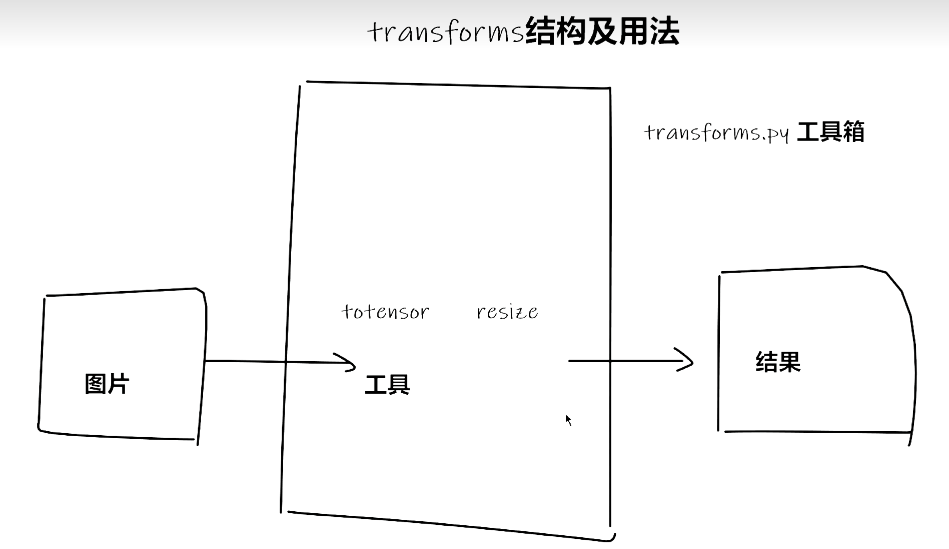

In [3]:
# python的用法 ->tensor的数据类型
#通过 transforms.ToTensor去查看两个问题
#1.transforms该如何使用 2.为什么需要Tensor这个数据类型
img_path = "../dataset/train/ants_image/0013035.jpg"
img = Image.open(img_path)

In [4]:
tensor_trans = transforms.ToTensor()
tensor_img = tensor_trans(img)
print(type(tensor_img))

<class 'torch.Tensor'>


In [5]:
#自定义类使用cv2模块读取图片
cv_img = cv2.imread(img_path)


In [6]:
writer = SummaryWriter("logs")
writer.add_image("Tensor_img" ,tensor_img)
writer.close()

In [7]:
img_path = "../dataset/train/ants_image/0013035.jpg"
img_1 = Image.open(img_path)
print(img_1)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=768x512 at 0x1FF76A77AF0>


In [17]:
transforms.Compose??

Init signature: transforms.Compose(transforms)
Source:        
class Compose:
    """Composes several transforms together. This transform does not support torchscript.
    Please, see the note below.

    Args:
        transforms (list of ``Transform`` objects): list of transforms to compose.

    Example:
        >>> transforms.Compose([
        >>>     transforms.CenterCrop(10),
        >>>     transforms.PILToTensor(),
        >>>     transforms.ConvertImageDtype(torch.float),
        >>> ])

    .. note::
        In order to script the transformations, please use ``torch.nn.Sequential`` as below.

        >>> transforms = torch.nn.Sequential(
        >>>     transforms.CenterCrop(10),
        >>>     transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
        >>> )
        >>> scripted_transforms = torch.jit.script(transforms)

        Make sure to use only scriptable transformations, i.e. that work with ``torch.Tensor``, does not require
        `lambda` functions 

In [8]:
# python中_call_的用法
class Person:
    def __call__(self, name):
        print("__call__"+ " Hello " + name)
    
    def hello(self,name):
        print("hello" + name)


In [9]:
person = Person()
person("zhangsan")
person.hello("lisa")

__call__ Hello zhangsan
hellolisa


In [10]:
trans_ToTensor = transforms.ToTensor()
img_tensor = trans_ToTensor(img_1)
writer.add_image("ToTensor_trans", img_tensor)
writer.close()

In [11]:
#Normalize 归一化
print(img_tensor[0][0][0])
trans_norm = transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])
img_norm = trans_norm(img_tensor)
print(img_norm[0][0][0])

tensor(0.3137)
tensor(-0.3725)


In [12]:
writer.add_image("Normalize", img_norm)

In [26]:
transforms.Resize??

Init signature:
transforms.Resize(
    size,
    interpolation=<InterpolationMode.BILINEAR: 'bilinear'>,
    max_size=None,
    antialias=True,
)
Source:        
class Resize(torch.nn.Module):
    """Resize the input image to the given size.
    If the image is torch Tensor, it is expected
    to have [..., H, W] shape, where ... means a maximum of two leading dimensions

    Args:
        size (sequence or int): Desired output size. If size is a sequence like
            (h, w), output size will be matched to this. If size is an int,
            smaller edge of the image will be matched to this number.
            i.e, if height > width, then image will be rescaled to
            (size * height / width, size).

            .. note::
                In torchscript mode size as single int is not supported, use a sequence of length 1: ``[size, ]``.
        interpolation (InterpolationMode): Desired interpolation enum defined by
            :class:`torchvision.transforms.InterpolationMode

In [16]:
#Resize
print(img.size)
trans_resize = transforms.Resize((512,512))
#img_resize -> resize -> img_resize -> PIL
img_resize = trans_resize(img)
#img_resize  PIL -> trans_ToTensor -> img_resize tensor
img_resize_tensor = trans_ToTensor(img_resize)
writer.add_image("img_resize",img_resize_tensor,global_step=0)
print(type(img_resize))
print(img_resize.size)

(768, 512)
<class 'PIL.Image.Image'>
(512, 512)


In [17]:
# Compose -> resize - method 2
trans_resize_2 = transforms.Resize(512)
#Compose: PIL -> PIL -> tensor
trans_compose = transforms.Compose([trans_resize_2, trans_ToTensor])
img_resize_2 = trans_compose(img)
writer.add_image("img_resize",img_resize_2, global_step=1) 

In [18]:
# 随机裁剪 RandomCrop(object)
# 传入的参数应为torch.Tensor格式
transforms.RandomCrop??

Init signature:
transforms.RandomCrop(
    size,
    padding=None,
    pad_if_needed=False,
    fill=0,
    padding_mode='constant',
)
Source:        
class RandomCrop(torch.nn.Module):
    """Crop the given image at a random location.
    If the image is torch Tensor, it is expected
    to have [..., H, W] shape, where ... means an arbitrary number of leading dimensions,
    but if non-constant padding is used, the input is expected to have at most 2 leading dimensions

    Args:
        size (sequence or int): Desired output size of the crop. If size is an
            int instead of sequence like (h, w), a square crop (size, size) is
            made. If provided a sequence of length 1, it will be interpreted as (size[0], size[0]).
        padding (int or sequence, optional): Optional padding on each border
            of the image. Default is None. If a single int is provided this
            is used to pad all borders. If sequence of length 2 is provided this is the padding
       

In [22]:
trans_random = transforms.RandomCrop((512,512))
trans_compose_2 = transforms.Compose([trans_random,trans_ToTensor])
for i in range(10):
    img_crop = trans_compose_2(img)
    writer.add_image("RandomCrop", img_crop, global_step=i)